In [45]:
using Pkg

# 1) Ativa o ambiente local
Pkg.activate(".")

# 2) Garante que o ambiente tenha todas as dependências
# (pode ser útil rodar de vez em quando ou quando algo quebrar)
Pkg.resolve()

# 3) Instala (se necessário) os pacotes que você vai usar
Pkg.add("Plots")
Pkg.add("Interpolations")
Pkg.add("DataFrames")
Pkg.add("DataInterpolations")
Pkg.add("Random")
Pkg.add("Distributions")
Pkg.add("BenchmarkTools")

# 4) Garante a instalação de todas as dependências
Pkg.instantiate()



  Activating project at `c:\Users\Eco\Desktop\Computational Methods\Problem Set 1`
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Project.toml`
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Project.toml`
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Project.toml`
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Project.toml`
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\Eco\Desktop\Computational Methods\Problem Set 1\Pro

# QUESTION 1

### a) What is your best guess for the life expectancy at birth for someone born in 1996?

### RESPOSTA DO ITEM A: 

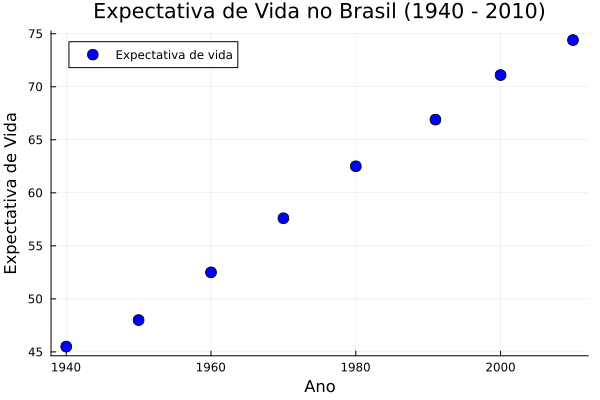

In [32]:
using Plots

# ----------------------------------------------------------------------------
# 1) Criar um dicionário com os dados
dados_vida = Dict(
    "anos" => [1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010],
    "expectativa" => [45.5, 48.0, 52.5, 57.6, 62.5, 66.9, 71.1, 74.4]
)

# ----------------------------------------------------------------------------
# 2) Plotar o gráfico de dispersão (scatter) dos dados
scatter(
    dados_vida["anos"], 
    dados_vida["expectativa"],
    markersize=6, markercolor=:blue,
    label="Expectativa de vida", 
    grid=true
)

# Rótulos e título (em português)
xlabel!("Ano")
ylabel!("Expectativa de Vida")
title!("Expectativa de Vida no Brasil (1940 - 2010)")


In [33]:
using Interpolations

# ----------------------------------------------------------------------------
# 1) Extrair dados do dicionário
anos = dados_vida["anos"]
expectativa_vida = dados_vida["expectativa"]

# 2) Definir o ano que desejamos estimar
ano_estimar = 1996

# 3) Interpolação Linear
itp_linear = linear_interpolation(anos, expectativa_vida, extrapolation_bc=Flat())
estimativa_linear = itp_linear(ano_estimar)

# 4) Interpolação Monotônica (PCHIP) usando FritschButland
#    *Atenção:* Este método pode falhar em dados não uniformes na sua versão atual do Interpolations.jl.
itp_pchip = interpolate(anos, expectativa_vida, FritschButlandMonotonicInterpolation())
estimativa_pchip = itp_pchip(ano_estimar)

# 5) Exibir resultados
println("Estimativa de expectativa de vida para o ano $ano_estimar:")
println("  - Interpolação Linear: ", round(estimativa_linear, digits=2))
println("  - Interpolação PCHIP : ", round(estimativa_pchip, digits=2))


Estimativa de expectativa de vida para o ano 1996:
  - Interpolação Linear: 69.23
  - Interpolação PCHIP : 69.3


### b) Using any interpolation method of your choice, plot the life expectancy for all years between 1940 and 2010.


### RESPOSTA DO ITEM B:

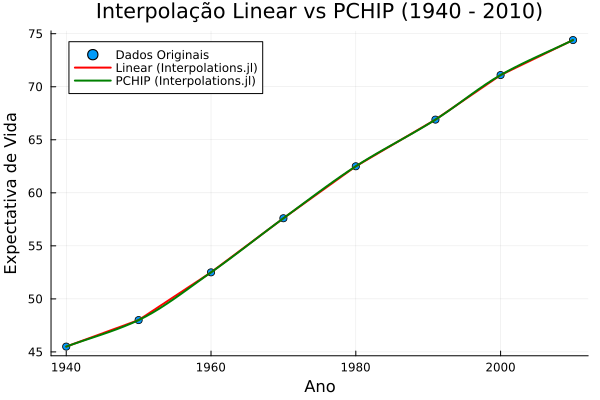

In [38]:
using Plots
using Interpolations  



# Extrair os dados do dicionário
anos = dados_vida["anos"]
expectativa = dados_vida["expectativa"]

# Criar um vetor com todos os anos de 1940 a 2010
anos_interp = collect(1940:2010)

# ----------------------------------------------------------------------------
# 1) Interpolação Linear (usando Interpolations.jl)
itp_linear = linear_interpolation(anos, expectativa, extrapolation_bc=Flat())
vida_linear = [itp_linear(x) for x in anos_interp]

# ----------------------------------------------------------------------------
# 2) Interpolação PCHIP (usando Fritsch-Butland para monotonicidade)
itp_pchip = interpolate(anos, expectativa, FritschButlandMonotonicInterpolation())
vida_pchip = [itp_pchip(x) for x in anos_interp]

# ----------------------------------------------------------------------------
# Plotar os dados originais e as curvas interpoladas
scatter(
    anos, expectativa,
    label="Dados Originais", marker=:circle,
    xlabel="Ano", ylabel="Expectativa de Vida",
    title="Interpolação Linear vs PCHIP (1940 - 2010)",
    legend=:topleft, grid=true
)

plot!(anos_interp, vida_linear, label="Linear (Interpolations.jl)", lw=2, color=:red)
plot!(anos_interp, vida_pchip, label="PCHIP (Interpolations.jl)", lw=2, color=:green)


# QUESTION 2

### a) Create a vector of trying points, x. Draw a sample with 2500 numbers using a uniform distribution over the interval [0,10]. You should keep this fixed for the entire exercise.

### RESPOSTA DO ITEM A:


In [40]:
using Random, Distributions

# Definir os parâmetros e armazenar em um dicionário para reuso
dados_q2 = Dict(
    "sigma" => 3,        # Parâmetro σ
    "epsilon" => 1e-8,   # Parâmetro ε
    "intervalo" => (0,10),  # Intervalo de amostragem [0,10]
    "n_pontos" => 2500   # Número de pontos a serem amostrados
)

# Definir a função f(x) conforme o enunciado
function f(x, sigma, epsilon)
    return ((x + epsilon)^(1 - sigma)) / (1 - sigma)
end

# Armazenar a função no dicionário para reuso nos próximos itens
dados_q2["f"] = f

# Fixar a semente para reprodutibilidade
Random.seed!(42)

# Gerar amostra de 2500 pontos uniformemente distribuídos em [0,10]
dados_q2["x"] = rand(Uniform(dados_q2["intervalo"]...), dados_q2["n_pontos"])

# Aplicar f(x) aos pontos gerados e armazenar no dicionário
dados_q2["fx"] = [dados_q2["f"](x, dados_q2["sigma"], dados_q2["epsilon"]) for x in dados_q2["x"]]

# Exibir os primeiros 10 pontos e seus respectivos f(x)
println("Primeiros 10 pontos gerados e seus respectivos f(x):")
for i in 1:10
    println("x = ", round(dados_q2["x"][i], digits=4), 
            " → f(x) = ", round(dados_q2["fx"][i], digits=4))
end


Primeiros 10 pontos gerados e seus respectivos f(x):
x = 1.7357 → f(x) = -0.166
x = 3.2166 → f(x) = -0.0483
x = 2.5859 → f(x) = -0.0748
x = 1.6644 → f(x) = -0.1805
x = 5.2702 → f(x) = -0.018
x = 4.8302 → f(x) = -0.0214
x = 3.9066 → f(x) = -0.0328
x = 8.0276 → f(x) = -0.0078
x = 9.8076 → f(x) = -0.0052
x = 0.9443 → f(x) = -0.5607


### b) Let our grid be from 0 to 10, we will use n = 10 points, equally spaced. First create the grid t. Then, compute the function for all the 10 grid points, generating a y vector.


### RESPOSTA DO ITEM B:

In [43]:
using Random, Distributions

# Criar um grid de 10 pontos igualmente espaçados no intervalo [0, 10]
dados_q2["grid_t"] = LinRange(dados_q2["intervalo"]..., 10)

# Calcular os valores da função f(x) para cada ponto do grid
dados_q2["y"] = [dados_q2["f"](x, dados_q2["sigma"], dados_q2["epsilon"]) for x in dados_q2["grid_t"]]

# Exibir os valores calculados
println("Grid t: ", dados_q2["grid_t"])
println("Valores de f(x) no grid: ", dados_q2["y"])


Grid t: LinRange{Float64}(0.0, 10.0, 10)
Valores de f(x) no grid: [-5.0e15, -0.40499999271000015, -0.10124999908875, -0.04499999973000001, -0.02531249988609375, -0.01619999994168, -0.01124999996625, -0.008265306101195337, -0.006328124985761716, -0.00499999999]


### (c) For each interpolation method (linear, spline, and pchip/akima), compute the approximation $\hat{f}(x)$ for all trying points and the error $e(x) = f(x) − \hat{f}(x)$. Summarize the results showing in a table the average quadratic error for each method and the average time of execution (for all 2500 points).


### RESPOSTA DO ITEM C:

In [ ]:
using Interpolations
using Statistics       # Para mean()
using BenchmarkTools   # Para @belapsed
using Printf           # Para @printf


# Extrair os dados do dicionário
t       = dados_q2["grid_t"]    # Grid com 10 pontos
y       = dados_q2["y"]         # f(t) no grid
x_test  = dados_q2["x"]         # 2500 pontos de teste
fx_exato = dados_q2["fx"]        # f(x) exato nos 2500 pontos

# ----------------------------------------------------------------------------
# 1) Criar os interpoladores

# 1.1 Interpolação Linear (usando Interpolations.jl)
itp_linear = linear_interpolation(t, y, extrapolation_bc=Flat())

# 1.2 Interpolação Spline Cúbico (usando Interpolations.jl)
itp_spline = cubic_spline_interpolation(t, y)

# 1.3 Interpolação PCHIP (usando FritschButlandMonotonicInterpolation())
itp_pchip = interpolate(t, y, FritschButlandMonotonicInterpolation())

# ----------------------------------------------------------------------------
# 2) Função auxiliar para avaliar o desempenho (MSE e tempo de execução)
function avaliar_interpolador(interpolador, xvals, fvals)
    # Medir o tempo de execução: use $ para injetar variáveis externas no macro
    tempo = @belapsed begin
        @inbounds [($interpolador)(xi) for xi in $xvals]
    end

    # Calcular as aproximações fora do macro
    fx_aprox = [interpolador(xi) for xi in xvals]
    mse = mean((fvals .- fx_aprox).^2)
    return (mse = mse, tempo = tempo)
end

# ----------------------------------------------------------------------------
# 3) Avaliar cada interpolador usando os 2500 pontos de teste
res_linear = avaliar_interpolador(itp_linear, x_test, fx_exato)
res_spline = avaliar_interpolador(itp_spline, x_test, fx_exato)
res_pchip  = avaliar_interpolador(itp_pchip,  x_test, fx_exato)

# Armazenar os resultados no dicionário para reuso em outros itens
dados_q2["resultados_item_c"] = Dict(
    "linear" => res_linear,
    "spline" => res_spline,
    "pchip"  => res_pchip
)

# ----------------------------------------------------------------------------
# 4) Exibir os resultados
println("===== Resultados do Item (c) =====")
println("Método  |      MSE       |  Tempo (s)")
println("------------------------------------------")

function imprime_resultado(nome, res)
    @printf("%-7s | %12.5e | %10.6f\n", nome, res.mse, res.tempo)
end

imprime_resultado("Linear", res_linear)
imprime_resultado("Spline", res_spline)
imprime_resultado("PCHIP",  res_pchip)


===== Resultados do Item (c) =====
Método  |      MSE       |  Tempo (s)
------------------------------------------
Linear  |  9.06932e+29 |   0.000027
Spline  |  7.71642e+29 |   0.000034
PCHIP   |  7.66695e+29 |   0.000082


### d) What happens when we increase our grid to n = 15? And to n = 20? And to n = 30? And to n = 50?

### RESPOSTA DO ITEM D:


In [ ]:
using Interpolations
using Statistics
using BenchmarkTools
using Printf



# Carregando (para facilitar)
f       = dados_q2["f"]
sigma   = dados_q2["sigma"]
epsilon = dados_q2["epsilon"]
x_test  = dados_q2["x"]      # 2500 pontos
fx_exato= dados_q2["fx"]     # f(x) exato nos 2500 pontos

# ----------------------------------------------------------------------------
# 2) Função para criar um grid de n pontos e calcular f nesse grid
function criar_grid(n, f, sigma, epsilon)
    # Grid de n pontos igualmente espaçados
    grid = LinRange(0, 10, n)
    # Valores da função exata no grid
    y = [f(ti, sigma, epsilon) for ti in grid]
    return grid, y
end

# ----------------------------------------------------------------------------
# 3) Função auxiliar para avaliar MSE e tempo (a mesma lógica do item c)
function avaliar_interpolador(interpolador, xvals, fvals)
    tempo = @belapsed begin
        @inbounds [($interpolador)(xi) for xi in $xvals]
    end
    fx_aprox = [interpolador(xi) for xi in xvals]
    mse = mean((fvals .- fx_aprox).^2)
    return (mse = mse, tempo = tempo)
end

# ----------------------------------------------------------------------------
# 4) Variação do tamanho do grid (n = 15, 20, 30, 50)
grid_sizes = [15, 20, 30, 50]

# Criaremos um dicionário para armazenar resultados do item (d)
dados_q2["resultados_item_d"] = Dict()

for n in grid_sizes
    # 4.1 Criar o grid e valores exatos no grid
    grid_t, grid_y = criar_grid(n, f, sigma, epsilon)

    # 4.2 Construir os interpoladores (linear, spline, pchip)
    itp_linear = linear_interpolation(grid_t, grid_y, extrapolation_bc=Flat())
    itp_spline = cubic_spline_interpolation(grid_t, grid_y)
    itp_pchip  = interpolate(grid_t, grid_y, FritschButlandMonotonicInterpolation())

    # 4.3 Avaliar cada interpolador nos 2500 pontos (x_test)
    res_linear = avaliar_interpolador(itp_linear, x_test, fx_exato)
    res_spline = avaliar_interpolador(itp_spline, x_test, fx_exato)
    res_pchip  = avaliar_interpolador(itp_pchip,  x_test, fx_exato)

    # 4.4 Guardar resultados em um sub-dicionário
    dados_q2["resultados_item_d"][n] = Dict(
        "linear" => res_linear,
        "spline" => res_spline,
        "pchip"  => res_pchip
    )
end

# ----------------------------------------------------------------------------
# 5) Exibir uma tabela de resultados para cada n
println("===== Resultados do Item (d) =====")

# Função para imprimir de forma organizada
function imprime_resultados_grid(n, res_dict)
    println("\nGrid size = $n")
    println("Método  |      MSE       |  Tempo (s)")
    println("-------------------------------------")
    for metodo in ["linear", "spline", "pchip"]
        res = res_dict[metodo]
        @printf("%-7s | %12.5e | %10.6f\n", metodo, res.mse, res.tempo)
    end
end

# Iterar sobre os tamanhos e imprimir
for n in grid_sizes
    imprime_resultados_grid(n, dados_q2["resultados_item_d"][n])
end


===== Resultados do Item (d) =====

Grid size = 15
Método  |      MSE       |  Tempo (s)
-------------------------------------
linear  |  6.07603e+29 |   0.000027
spline  |  5.13439e+29 |   0.000034
pchip   |  5.09347e+29 |   0.000082

Grid size = 20
Método  |      MSE       |  Tempo (s)
-------------------------------------
linear  |  4.54087e+29 |   0.000027
spline  |  3.79128e+29 |   0.000034
pchip   |  3.75223e+29 |   0.000082

Grid size = 30
Método  |      MSE       |  Tempo (s)
-------------------------------------
linear  |  2.95235e+29 |   0.000027
spline  |  2.45277e+29 |   0.000034
pchip   |  2.42434e+29 |   0.000082

Grid size = 50
Método  |      MSE       |  Tempo (s)
-------------------------------------
linear  |  1.70057e+29 |   0.000027
spline  |  1.41567e+29 |   0.000034
pchip   |  1.38375e+29 |   0.000082


### e) Now let’s repeat items b)–d) using a log-spaced grid.

### RESPOSTA DO ITEM E: 


In [52]:
# -----------------------------------------------------------
# (e) Repeating items (b)–(d) using a log-spaced grid
#
# Observação: Como não podemos usar 0 em escala logarítmica, 
# escolhemos a = 0.0001 e b = 10 como os limites inferior e superior.
# -----------------------------------------------------------

# Limites para o grid log-spaced
a = 0.0001
b = 10.0

# Vamos testar com os mesmos tamanhos de grid: 10, 15, 20, 30, 50
grid_sizes_log = [10, 15, 20, 30, 50]

# Criar um novo dicionário para armazenar os resultados do item (e)
dados_q2["resultados_item_e"] = Dict()

for n in grid_sizes_log
    # Criar grid log-spaced: os pontos são distribuídos igualmente no espaço logarítmico
    grid_t_log = exp.(range(log(a), log(b), length=n))
    # Calcular os valores exatos da função f(x) nesse grid
    y_log = [dados_q2["f"](ti, dados_q2["sigma"], dados_q2["epsilon"]) for ti in grid_t_log]
    
    # Construir os interpoladores usando o grid log-spaced
    itp_linear_log = linear_interpolation(grid_t_log, y_log, extrapolation_bc=Flat())
    itp_spline_log = cubic_spline_interpolation(grid_t_log, y_log)
    itp_pchip_log  = interpolate(grid_t_log, y_log, FritschButlandMonotonicInterpolation())
    
    # Avaliar cada interpolador nos mesmos 2500 pontos de teste (x_test) e comparar com fx_exato
    res_linear_log = avaliar_interpolador(itp_linear_log, dados_q2["x"], dados_q2["fx"])
    res_spline_log = avaliar_interpolador(itp_spline_log, dados_q2["x"], dados_q2["fx"])
    res_pchip_log  = avaliar_interpolador(itp_pchip_log,  dados_q2["x"], dados_q2["fx"])
    
    # Armazenar os resultados para esse tamanho de grid
    dados_q2["resultados_item_e"][n] = Dict(
        "linear" => res_linear_log,
        "spline" => res_spline_log,
        "pchip"  => res_pchip_log
    )
end

# Exibir os resultados em formato de tabela para cada tamanho de grid log-spaced
println("===== Resultados do Item (e) - Log-Spaced Grid =====")
for n in grid_sizes_log
    println("\nGrid size (log-spaced) = $n")
    println("Método  |      MSE       |  Tempo (s)")
    println("------------------------------------------")
    for metodo in ["linear", "spline", "pchip"]
        res = dados_q2["resultados_item_e"][n][metodo]
        @printf("%-7s | %12.5e | %10.6f\n", metodo, res.mse, res.tempo)
    end
end


MethodError: MethodError: no method matching cubic_spline_interpolation(::Vector{Float64}, ::Vector{Float64})
The function `cubic_spline_interpolation` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  cubic_spline_interpolation(!Matched::NTuple{N, AbstractRange}, ::AbstractArray{T, N}; bc, extrapolation_bc) where {N, T}
   @ Interpolations C:\Users\Eco\.julia\packages\Interpolations\91PhN\src\convenience-constructors.jl:28
  cubic_spline_interpolation(!Matched::AbstractRange, ::AbstractVector; bc, extrapolation_bc)
   @ Interpolations C:\Users\Eco\.julia\packages\Interpolations\91PhN\src\convenience-constructors.jl:11
